The dataset used in this project is available publicly on Kaggle: https://www.kaggle.com/datasets/edusanketdk/electronics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
amazon=pd.read_csv("electronics.csv")
amazon

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0


# EDA

In [16]:
amazon.columns

Index(['item_id', 'user_id', 'rating', 'timestamp', 'model_attr', 'category',
       'brand', 'year', 'user_attr', 'split'],
      dtype='object')

In [18]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [19]:
amazon.index

RangeIndex(start=0, stop=1292954, step=1)

In [20]:
amazon.columns.nunique()

10

In [21]:
amazon.dtypes

item_id         int64
user_id         int64
rating        float64
timestamp      object
model_attr     object
category       object
brand          object
year            int64
user_attr      object
split           int64
dtype: object

In [3]:
amazon.shape

(1292954, 10)

# Data Wrangling - 
### Data wrangling means cleaning and preparing raw data so it becomes usable for analysis.

Step - 1  Check Missing Values 

In [13]:
amazon.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand          961834
year                0
user_attr     1118830
split               0
dtype: int64

Step - 2 Remove Duplicates

In [14]:
amazon.duplicated().sum()

np.int64(0)

# QUESTIONS

# the distribution of ratings 

<Axes: xlabel='rating', ylabel='count'>

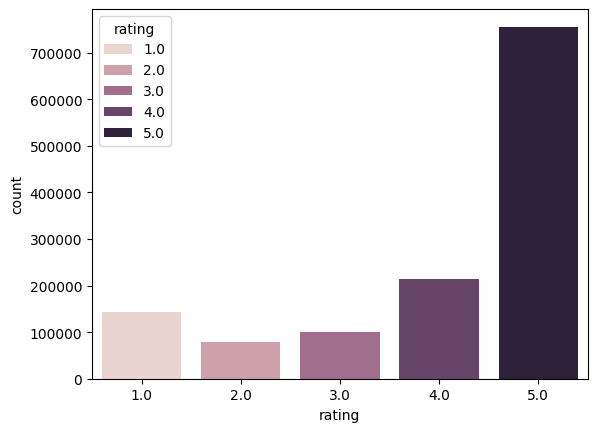

In [6]:
sns.countplot(data=amazon,x="rating",hue="rating")

# what was the best year of sales

<Axes: xlabel='year', ylabel='count'>

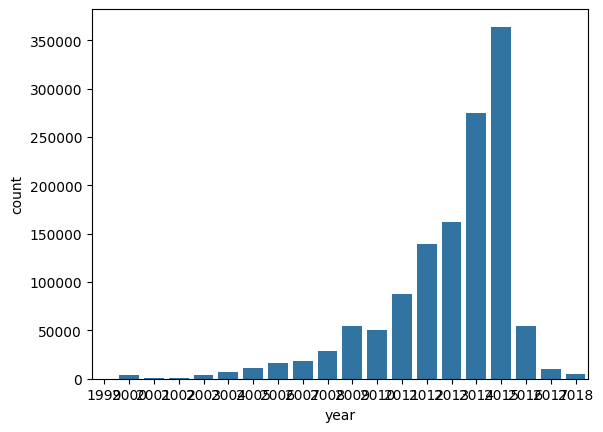

In [7]:
sns.countplot(data=amazon,x="year")

In [11]:
sales=amazon.groupby('year')['rating'].count()
sales

year
1999       118
2000      3572
2001       702
2002       955
2003      3949
2004      7195
2005     11577
2006     16336
2007     17989
2008     28520
2009     54333
2010     50315
2011     87695
2012    139154
2013    161695
2014    275194
2015    364004
2016     54598
2017     10429
2018      4624
Name: rating, dtype: int64

<Axes: xlabel='year'>

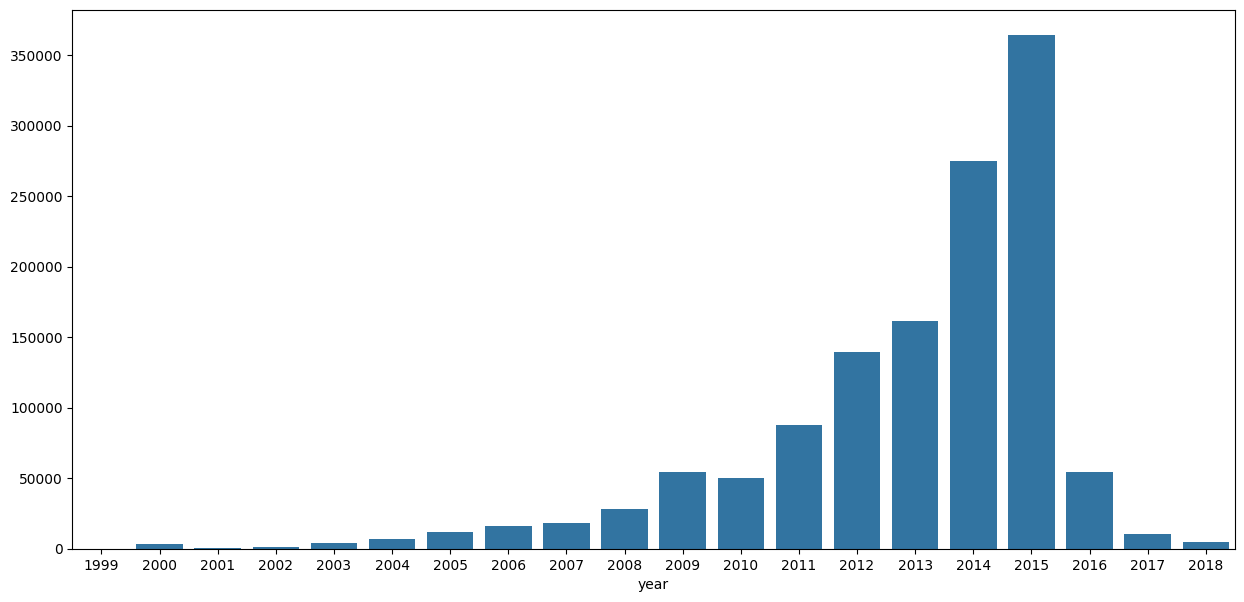

In [14]:
plt.figure(figsize=[15,7])
sns.barplot(x=sales.index,y=sales.values)

### so 2015 was the best year of sales
### 1999 had the lowest sales 
###  after 2015 sales starts to drop

# what brand sold the most in 2015

In [19]:
amazon_2015 = amazon[amazon['year']==2015]
amazon_2015

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
123,6,123,1.0,2000-06-10,Female,Camera & Photo,Panasonic,2015,NaN,0
125,6,125,4.0,2000-06-10,Female,Camera & Photo,Panasonic,2015,NaN,0
129,6,129,5.0,2000-06-14,Female,Camera & Photo,Panasonic,2015,NaN,0
208,6,207,4.0,2000-12-03,Female,Camera & Photo,Panasonic,2015,NaN,0
302,6,299,3.0,2001-03-21,Female,Camera & Photo,Panasonic,2015,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1292843,8239,67472,5.0,2018-09-01,Male,Computers & Accessories,NaN,2015,NaN,2
1292854,7952,1157539,5.0,2018-09-02,Male,Headphones,NaN,2015,NaN,0
1292856,8443,1157540,5.0,2018-09-02,Male,Camera & Photo,NaN,2015,NaN,0
1292857,8487,1157541,3.0,2018-09-02,Female,Television & Video,NaN,2015,Female,0


In [22]:
amazon_2015.groupby('brand') ['rating'].count().sort_values(ascending=False).head(10)

brand
Mpow          14525
Bose           9143
TaoTronics     5163
Etre Jeune     4006
Fintie         3037
Fujifilm       2895
Skullcandy     2580
Polaroid       2366
Neewer         2350
EldHus         1983
Name: rating, dtype: int64

In [23]:
top_10_2015=amazon_2015.groupby('brand') ['rating'].count().sort_values(ascending=False).head(10)
top_10_2015

brand
Mpow          14525
Bose           9143
TaoTronics     5163
Etre Jeune     4006
Fintie         3037
Fujifilm       2895
Skullcandy     2580
Polaroid       2366
Neewer         2350
EldHus         1983
Name: rating, dtype: int64

<Axes: xlabel='brand'>

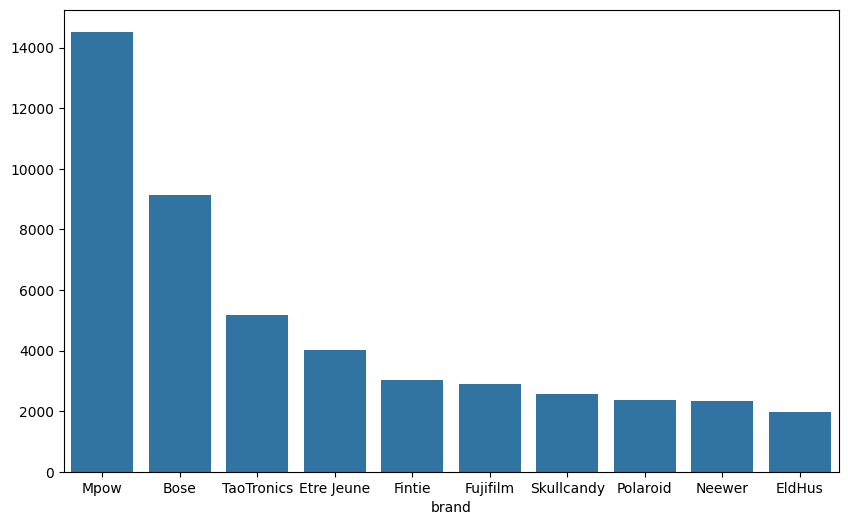

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_2015.index,y=top_10_2015.values)

# what product sold the most in 2016


In [29]:
amazon_2016 = amazon[amazon['year']==2016]
amazon_2016

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
1944,126,1878,5.0,2003-12-29,Female,Computers & Accessories,Sony,2016,NaN,0
2020,126,1952,5.0,2004-01-26,Female,Computers & Accessories,Sony,2016,NaN,0
2411,126,2327,5.0,2004-06-13,Female,Computers & Accessories,Sony,2016,Male,0
2428,126,2343,4.0,2004-06-18,Female,Computers & Accessories,Sony,2016,NaN,0
4383,257,4207,4.0,2005-08-13,Female,Camera & Photo,Olympus,2016,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1292945,9320,1157625,5.0,2018-09-25,Female&Male,Computers & Accessories,ebasy,2016,NaN,0
1292946,9308,1157626,2.0,2018-09-25,Female,Computers & Accessories,NaN,2016,NaN,0
1292947,9263,111199,4.0,2018-09-25,Male,Camera & Photo,NaN,2016,NaN,2
1292948,9217,1157627,5.0,2018-09-25,Male,Headphones,NaN,2016,NaN,0


In [32]:
top_10_2016=amazon_2016.groupby('brand') ['rating'].count().sort_values(ascending=False).head(10)
top_10_2016

brand
EldHus          1627
Etre Jeune       999
Cooper Cases     468
Fintie           430
Canon            420
Panasonic        383
ebasy            353
Tiamat           329
Neewer           328
Pyle             320
Name: rating, dtype: int64

<Axes: xlabel='brand'>

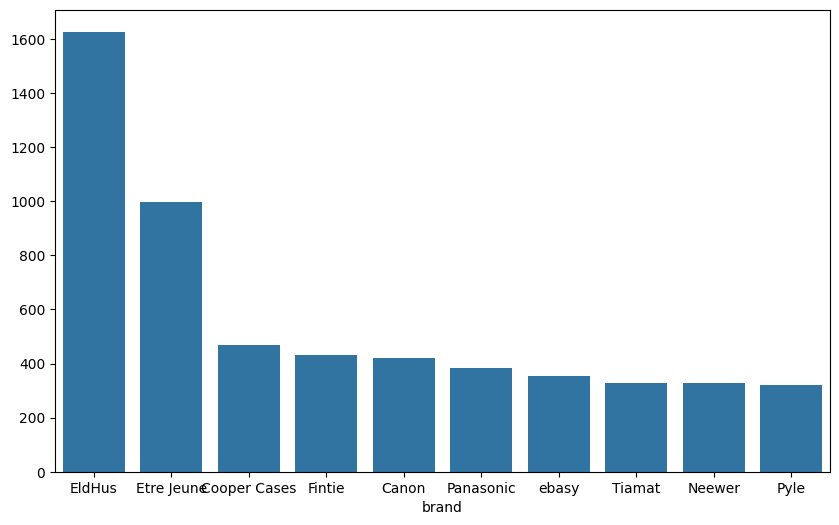

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_2016.index,y=top_10_2016.values)

# what product sold the most in 2017

In [28]:
amazon_2017 = amazon[amazon['year']==2017]
amazon_2017

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
365,30,359,5.0,2001-06-06,Female,Camera & Photo,Sony,2017,NaN,0
376,30,370,5.0,2001-06-14,Female,Camera & Photo,Sony,2017,NaN,0
682,30,671,5.0,2002-01-24,Female,Camera & Photo,Sony,2017,Male,0
3573,221,3431,5.0,2005-03-15,Female,Accessories & Supplies,NaN,2017,NaN,0
5031,221,4841,5.0,2005-11-07,Female,Accessories & Supplies,NaN,2017,Female,0
...,...,...,...,...,...,...,...,...,...,...
1292919,9370,1157599,5.0,2018-09-18,Male,Camera & Photo,NaN,2017,NaN,0
1292939,9435,1157619,5.0,2018-09-23,Female,Computers & Accessories,NaN,2017,NaN,0
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0


In [33]:
top_10_2017=amazon_2017.groupby('brand') ['rating'].count().sort_values(ascending=False).head(10)
top_10_2017

brand
Etre Jeune      394
Panasonic       349
Cooper Cases    165
LSS             111
Fintie          110
Savage          100
Canon            92
Fujifilm         76
XShields         63
Sony             56
Name: rating, dtype: int64

<Axes: xlabel='brand'>

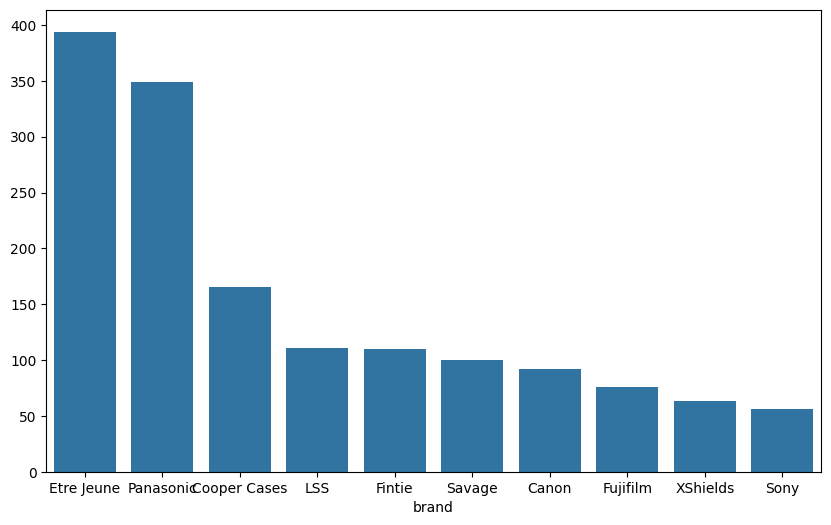

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_2017.index,y=top_10_2017.values)

# what product sold the most in 2018


In [27]:
amazon_2018 = amazon[amazon['year']==2018]
amazon_2018

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
144,9,144,5.0,2000-07-10,Female,Camera & Photo,JVC,2018,NaN,0
270,9,268,2.0,2001-02-25,Female,Camera & Photo,JVC,2018,NaN,0
992,9,973,3.0,2002-10-23,Female,Camera & Photo,JVC,2018,NaN,0
2853,182,2749,5.0,2004-10-19,Female,Computers & Accessories,NaN,2018,NaN,0
5091,285,4900,2.0,2005-11-21,Male,Camera & Photo,JVC,2018,Female,0
...,...,...,...,...,...,...,...,...,...,...
1292916,9534,1157596,2.0,2018-09-17,Female&Male,Camera & Photo,NaN,2018,NaN,0
1292917,9544,1157597,5.0,2018-09-17,Female&Male,Camera & Photo,NaN,2018,NaN,0
1292936,9520,1157616,4.0,2018-09-22,Female&Male,Camera & Photo,NaN,2018,NaN,0
1292937,9558,1157617,2.0,2018-09-22,Female&Male,Camera & Photo,NaN,2018,NaN,0


In [34]:
top_10_2018=amazon_2018.groupby('brand') ['rating'].count().sort_values(ascending=False).head(10)
top_10_2018

brand
LSS             144
Sony             85
Savage           72
Fujifilm         59
Mpow             52
Logitech         31
Philips          30
Cooper Cases     29
Pyle             27
Sennheiser       25
Name: rating, dtype: int64

<Axes: xlabel='brand'>

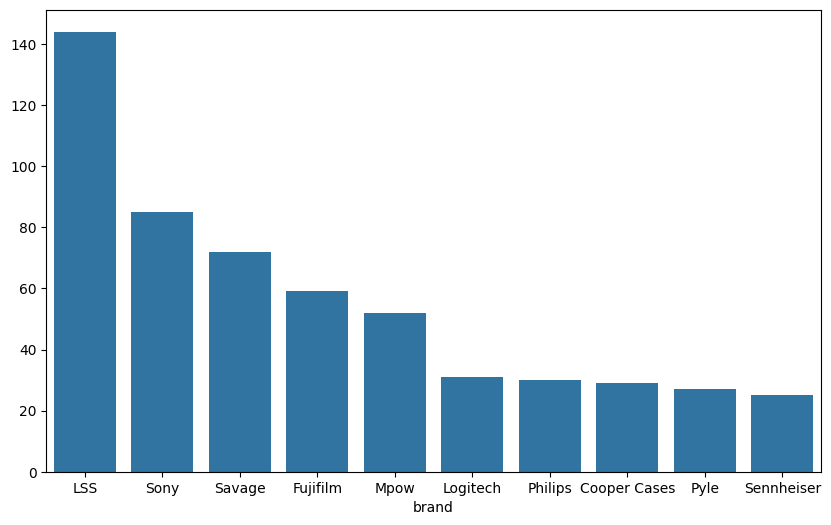

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_2018.index,y=top_10_2018.values)

# How much was made in sales in the year 2015

In [39]:
amazon_2015

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
123,6,123,1.0,2000-06-10,Female,Camera & Photo,Panasonic,2015,NaN,0
125,6,125,4.0,2000-06-10,Female,Camera & Photo,Panasonic,2015,NaN,0
129,6,129,5.0,2000-06-14,Female,Camera & Photo,Panasonic,2015,NaN,0
208,6,207,4.0,2000-12-03,Female,Camera & Photo,Panasonic,2015,NaN,0
302,6,299,3.0,2001-03-21,Female,Camera & Photo,Panasonic,2015,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1292843,8239,67472,5.0,2018-09-01,Male,Computers & Accessories,NaN,2015,NaN,2
1292854,7952,1157539,5.0,2018-09-02,Male,Headphones,NaN,2015,NaN,0
1292856,8443,1157540,5.0,2018-09-02,Male,Camera & Photo,NaN,2015,NaN,0
1292857,8487,1157541,3.0,2018-09-02,Female,Television & Video,NaN,2015,Female,0


<Axes: xlabel='year', ylabel='count'>

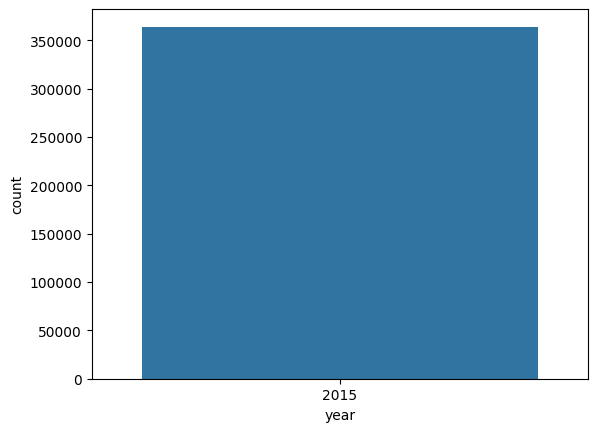

In [41]:
sns.countplot(data=amazon_2015,x='year')

<Axes: xlabel='year'>

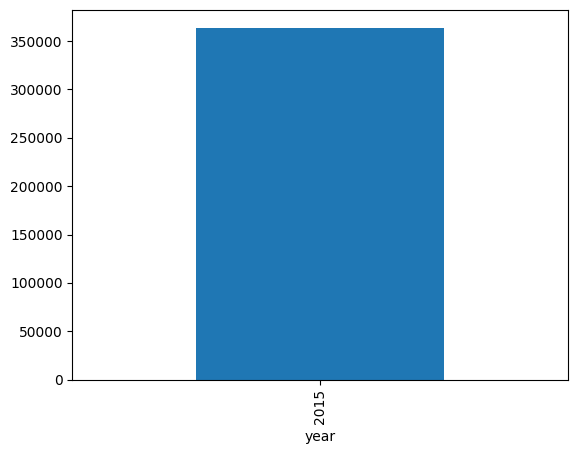

In [42]:
amazon[amazon['year'] == 2015].groupby('year')['rating'].count().plot(kind='bar')

# We can see that the year 2015 had the best sales.

# what was the best month of sales

In [46]:
amazon['month']=pd.DatetimeIndex(amazon['timestamp']).month

<Axes: xlabel='month'>

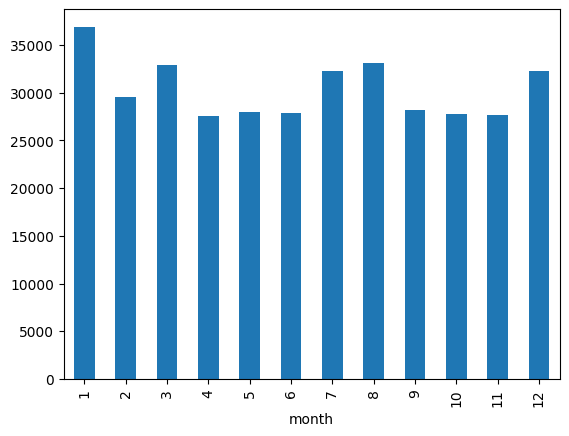

In [48]:
amazon[amazon['year'] == 2015].groupby('month')['rating'].count().plot(kind='bar')

In [49]:
amazon_2015['month']=pd.DatetimeIndex(amazon_2015['timestamp']).month

C:\Users\admin\AppData\Local\Temp\ipykernel_17872\2804082090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_2015['month']=pd.DatetimeIndex(amazon_2015['timestamp']).month


In [50]:
amazon_2015

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split,month
123,6,123,1.0,2000-06-10,Female,Camera & Photo,Panasonic,2015,NaN,0,6
125,6,125,4.0,2000-06-10,Female,Camera & Photo,Panasonic,2015,NaN,0,6
129,6,129,5.0,2000-06-14,Female,Camera & Photo,Panasonic,2015,NaN,0,6
208,6,207,4.0,2000-12-03,Female,Camera & Photo,Panasonic,2015,NaN,0,12
302,6,299,3.0,2001-03-21,Female,Camera & Photo,Panasonic,2015,NaN,0,3
...,...,...,...,...,...,...,...,...,...,...,...
1292843,8239,67472,5.0,2018-09-01,Male,Computers & Accessories,NaN,2015,NaN,2,9
1292854,7952,1157539,5.0,2018-09-02,Male,Headphones,NaN,2015,NaN,0,9
1292856,8443,1157540,5.0,2018-09-02,Male,Camera & Photo,NaN,2015,NaN,0,9
1292857,8487,1157541,3.0,2018-09-02,Female,Television & Video,NaN,2015,Female,0,9


<Axes: xlabel='month', ylabel='count'>

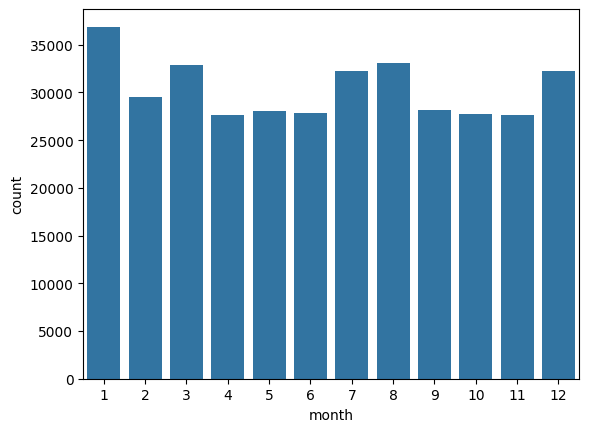

In [52]:
sns.countplot(data=amazon_2015,x="month")

# What product by brand name sold the most?

In [54]:
amazon.groupby('brand')['rating'].count().sort_values(ascending=False).head(10)

brand
Bose          29222
Logitech      29203
Sony          20360
Mpow          17477
EldHus        16530
Sennheiser    13322
Fujifilm      12245
TaoTronics    12125
Etre Jeune    11753
Pyle          11606
Name: rating, dtype: int64

In [63]:
brand_sales=amazon.groupby('brand')['rating'].count().sort_values(ascending=False).head(10)
brand_sales

brand
Bose          29222
Logitech      29203
Sony          20360
Mpow          17477
EldHus        16530
Sennheiser    13322
Fujifilm      12245
TaoTronics    12125
Etre Jeune    11753
Pyle          11606
Name: rating, dtype: int64

<Axes: xlabel='brand'>

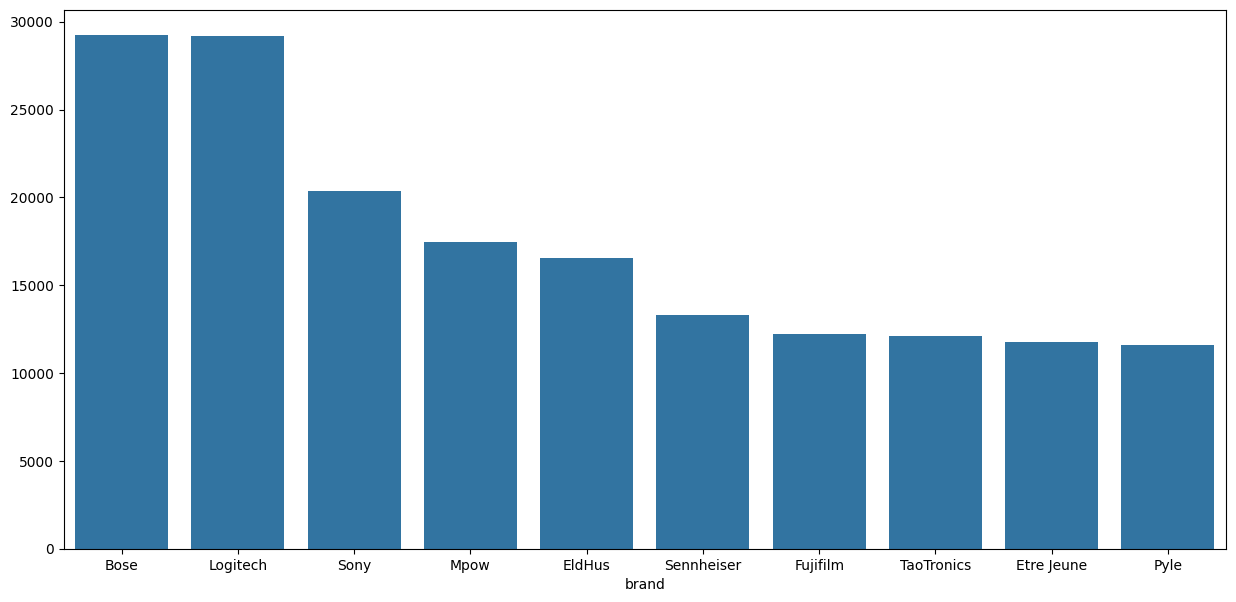

In [66]:
plt.figure(figsize=[15,7])
sns.barplot(x=brand_sales.index,y=brand_sales.values)

<Axes: xlabel='brand', ylabel='count'>

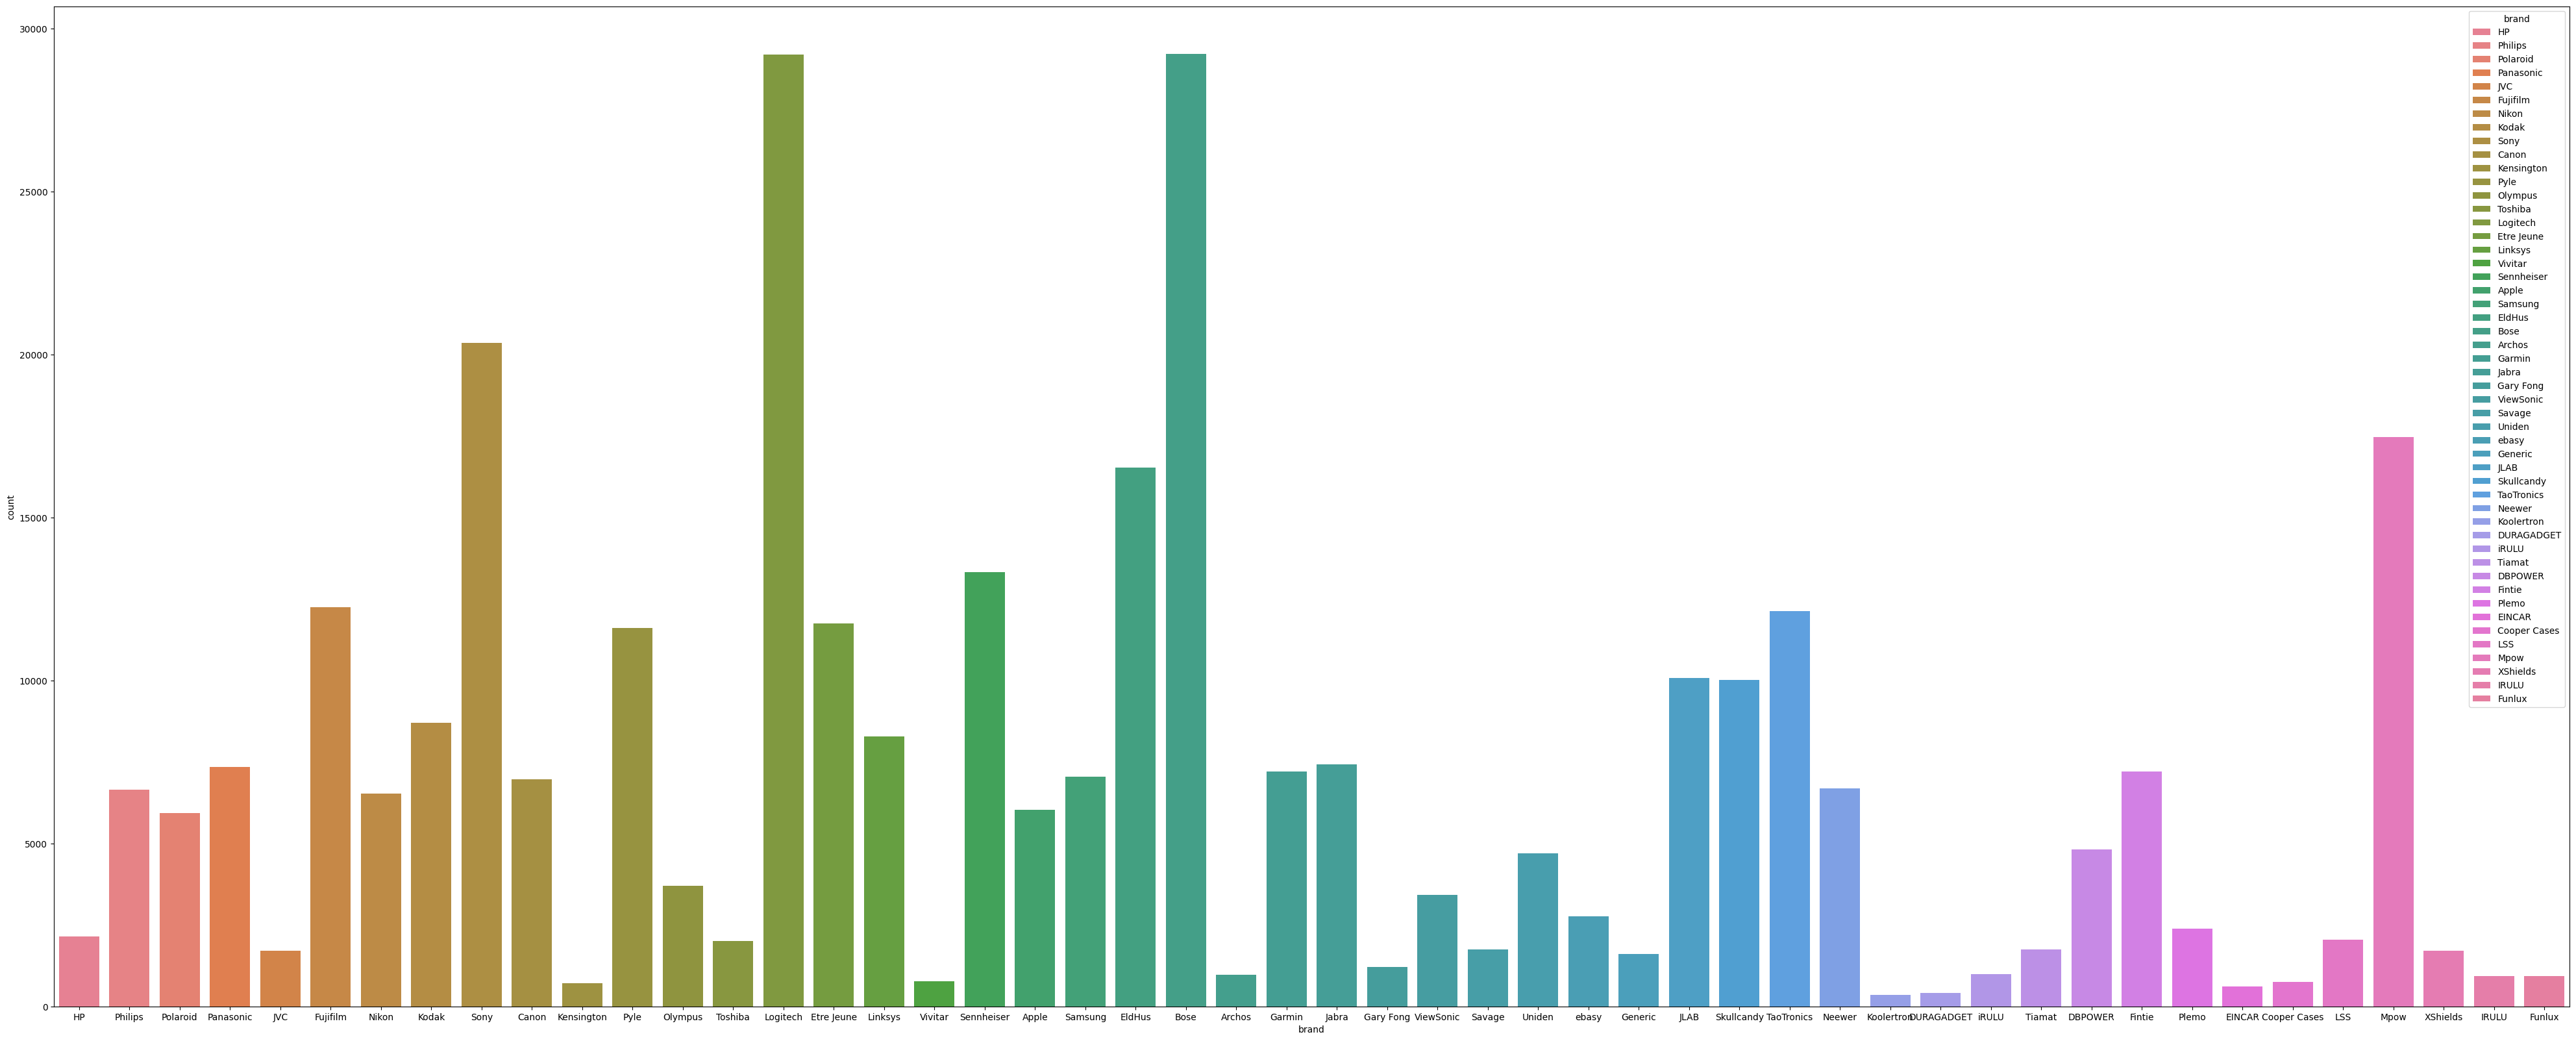

In [64]:
plt.figure(figsize=[50,20])
sns.countplot(data=amazon,x='brand',hue='brand')

# What product by category sold the most?

In [83]:
amazon.groupby('category')['rating'].count().sort_values(ascending=False).head(10)

category
Headphones                 359334
Computers & Accessories    322938
Camera & Photo             192573
Accessories & Supplies     158598
Portable Audio & Video     143370
Car Electronics & GPS       33070
Television & Video          32057
Home Audio                  24193
Wearable Technology         16015
Security & Surveillance     10806
Name: rating, dtype: int64

In [84]:
category_sales=amazon.groupby('category')['rating'].count().sort_values(ascending=False).head(10)

<Axes: xlabel='category'>

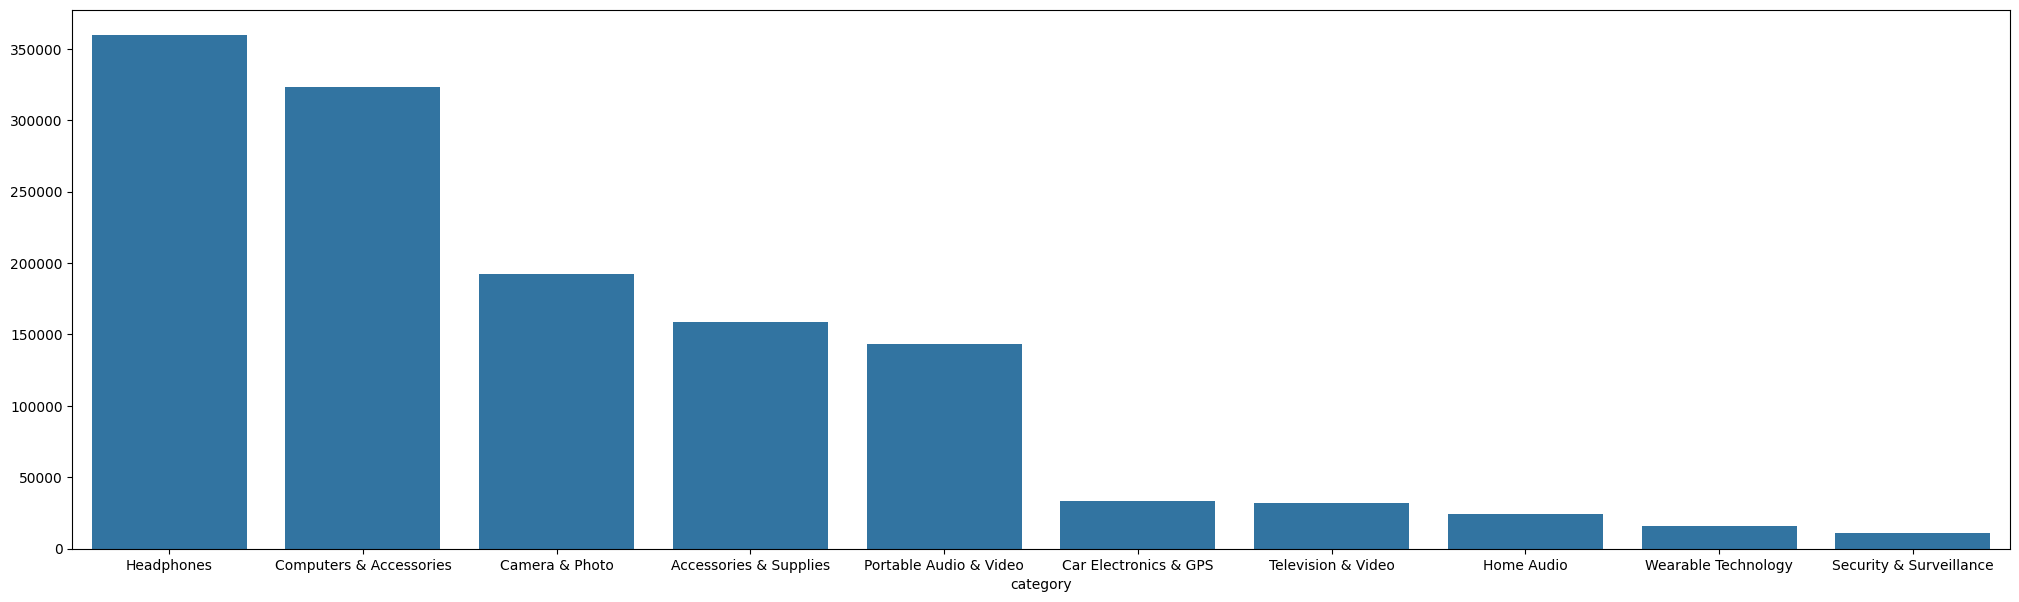

In [87]:
plt.figure(figsize=[25,7])
sns.barplot(x=category_sales.index,y=category_sales.values)

# What product by brand name sold the least?

In [71]:
brand_sales=amazon.groupby('brand')['rating'].count().sort_values().head(10)
brand_sales

brand
Koolertron      344
DURAGADGET      419
EINCAR          616
Kensington      721
Cooper Cases    745
Vivitar         774
IRULU           933
Funlux          939
Archos          961
iRULU           991
Name: rating, dtype: int64

<Axes: xlabel='brand'>

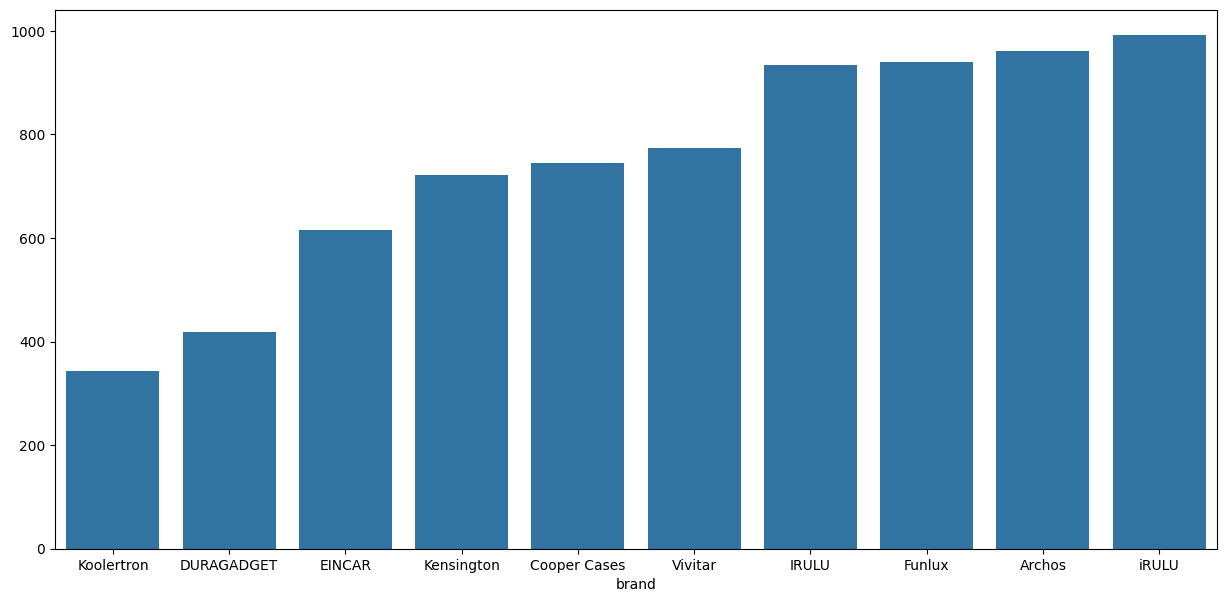

In [72]:
plt.figure(figsize=[15,7])
sns.barplot(x=brand_sales.index,y=brand_sales.values)

# What product by category sold the least?

In [88]:
category_sales=amazon.groupby('category')['rating'].count().sort_values().head(10)

<Axes: xlabel='category'>

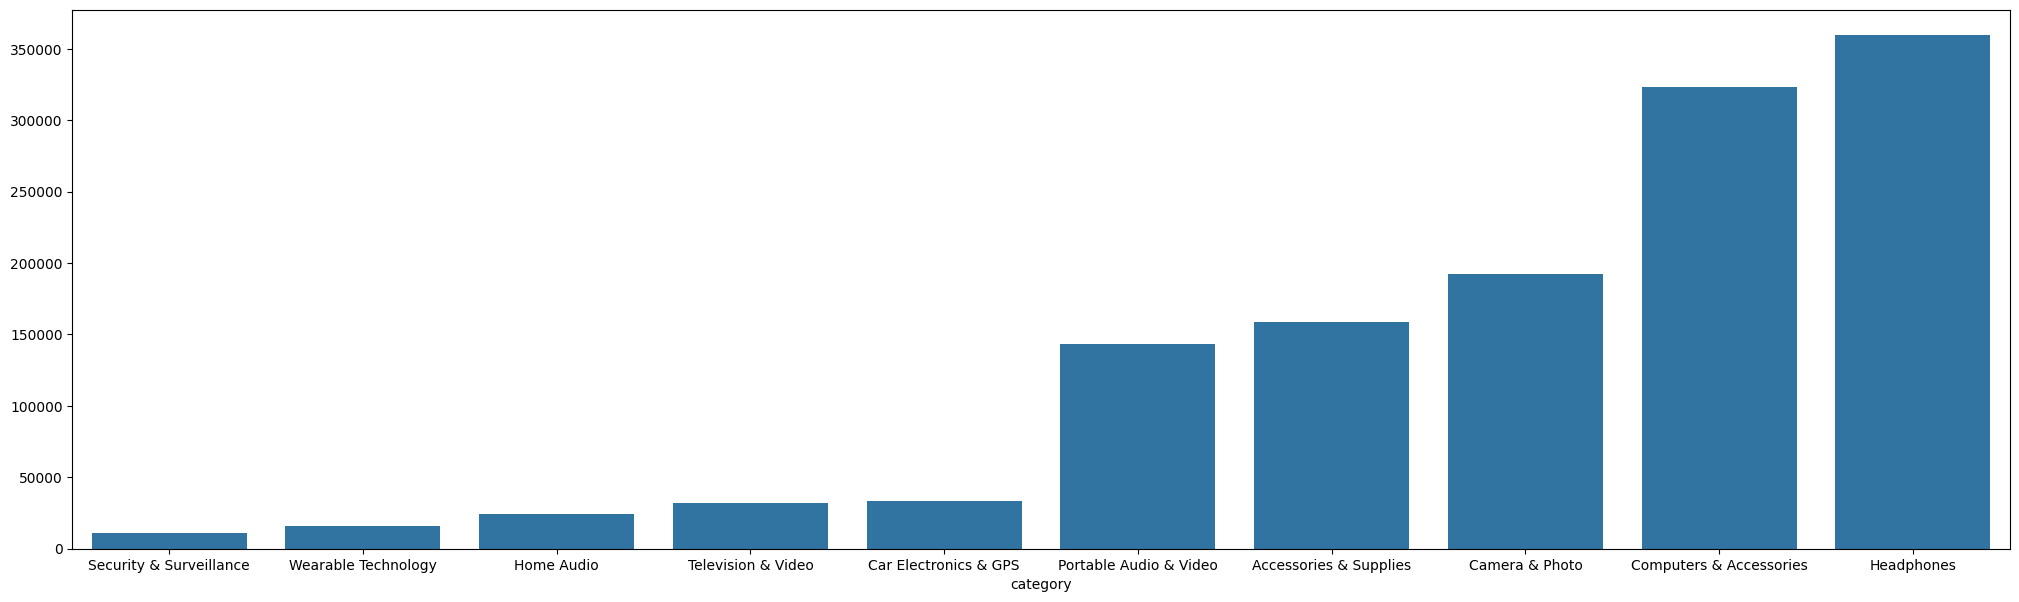

In [89]:
plt.figure(figsize=[25,7])
sns.barplot(x=category_sales.index,y=category_sales.values)

# category percentage sales


In [90]:
category_sales=amazon.groupby('category')['rating'].count().sort_values(ascending=False).head(10)

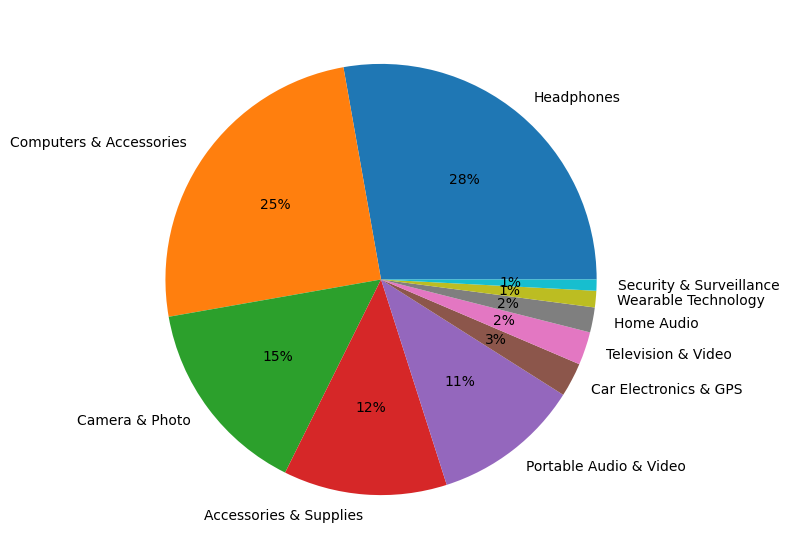

In [91]:
plt.figure(figsize=[15,7])
plt.pie(category_sales,
        autopct='%.0f%%',
        labels=category_sales.index
       )
plt.show()


# brand percentage sales

In [75]:
brand_sales=amazon.groupby('brand')['rating'].count().sort_values(ascending=False).head(10)
brand_sales

brand
Bose          29222
Logitech      29203
Sony          20360
Mpow          17477
EldHus        16530
Sennheiser    13322
Fujifilm      12245
TaoTronics    12125
Etre Jeune    11753
Pyle          11606
Name: rating, dtype: int64

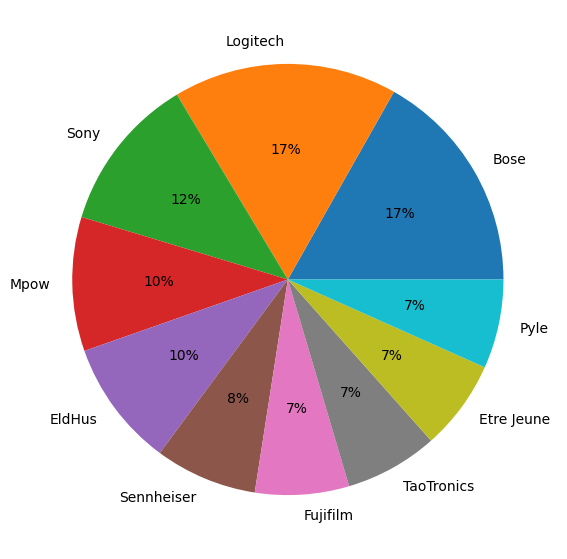

In [81]:
plt.figure(figsize=[15,7])
plt.pie(brand_sales,
        autopct='%.0f%%',
        labels=brand_sales.index
       )
plt.show()
